In [16]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Import 'offense' file
offense = pd.read_csv("nfl_offense.csv")
offense.head()

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
0,202009100kan,WatsDe00,QB,Deshaun Watson,HOU,20,32,253,1,1,...,False,outdoors,astroturf,56,95,7,-9.5,KAN,53.5,2020-09-10
1,202009100kan,JohnDa08,RB,David Johnson,HOU,0,0,0,0,0,...,False,outdoors,astroturf,56,95,7,-9.5,KAN,53.5,2020-09-10
2,202009100kan,JohnDu00,RB,Duke Johnson,HOU,0,0,0,0,0,...,False,outdoors,astroturf,56,95,7,-9.5,KAN,53.5,2020-09-10
3,202009100kan,FullWi01,WR,Will Fuller,HOU,0,0,0,0,0,...,False,outdoors,astroturf,56,95,7,-9.5,KAN,53.5,2020-09-10
4,202009100kan,AkinJo00,TE,Jordan Akins,HOU,0,0,0,0,0,...,False,outdoors,astroturf,56,95,7,-9.5,KAN,53.5,2020-09-10


In [18]:
# Number of rows, columns
offense.shape

(6320, 69)

In [19]:
# All columns and respective data types
offense.info() # no NaNs or nulls so data likely does not need to be cleaned.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6320 entries, 0 to 6319
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   game_id                       6320 non-null   object 
 1   player_id                     6320 non-null   object 
 2   pos                           6320 non-null   object 
 3   player                        6320 non-null   object 
 4   team                          6320 non-null   object 
 5   pass_cmp                      6320 non-null   int64  
 6   pass_att                      6320 non-null   int64  
 7   pass_yds                      6320 non-null   int64  
 8   pass_td                       6320 non-null   int64  
 9   pass_int                      6320 non-null   int64  
 10  pass_sacked                   6320 non-null   int64  
 11  pass_sacked_yds               6320 non-null   int64  
 12  pass_long                     6320 non-null   int64  
 13  pas

In [20]:
# Import a file which has the team name for its three-letter team code
team_codes_names = pd.read_csv("team_codes_names.txt",
                               sep="|",
                               names=["team_code", "team_name"])
team_codes_names.head()

,team_code,team_name
0,SFO,49ers
1,CHI,Bears
2,CIN,Bengals
3,BUF,Bills
4,DEN,Broncos


In [21]:
# Create an object which contains the column names from 'offense' that should be re-mapped with team names
columns_to_remap = ["team", "Team_abbrev", "Opponent_abbrev", "vis_team", "home_team", "Vegas_Favorite"]

# Loop to replace all team names for each column listed above
for c in columns_to_remap:
  offense[c] = offense[c].map(team_codes_names.set_index("team_code")["team_name"])

offense.head()

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
0,202009100kan,WatsDe00,QB,Deshaun Watson,Texans,20,32,253,1,1,...,False,outdoors,astroturf,56,95,7,-9.5,Chiefs,53.5,2020-09-10
1,202009100kan,JohnDa08,RB,David Johnson,Texans,0,0,0,0,0,...,False,outdoors,astroturf,56,95,7,-9.5,Chiefs,53.5,2020-09-10
2,202009100kan,JohnDu00,RB,Duke Johnson,Texans,0,0,0,0,0,...,False,outdoors,astroturf,56,95,7,-9.5,Chiefs,53.5,2020-09-10
3,202009100kan,FullWi01,WR,Will Fuller,Texans,0,0,0,0,0,...,False,outdoors,astroturf,56,95,7,-9.5,Chiefs,53.5,2020-09-10
4,202009100kan,AkinJo00,TE,Jordan Akins,Texans,0,0,0,0,0,...,False,outdoors,astroturf,56,95,7,-9.5,Chiefs,53.5,2020-09-10


In [22]:
# All unique team names in a list, sorted alphabetically. Same can be done for all re-mapped columns if needed.
all_team_codes = offense["team"].unique()
all_team_codes_list = sorted(all_team_codes.tolist())
all_team_codes_list

['49ers',
 'Bears',
 'Bengals',
 'Bills',
 'Broncos',
 'Browns',
 'Cardinals',
 'Chargers',
 'Chiefs',
 'Colts',
 'Commanders',
 'Cowboys',
 'Dolphins',
 'Eagles',
 'Falcons',
 'Giants',
 'Jaguars',
 'Jets',
 'Lions',
 'Packers',
 'Panthers',
 'Patriots',
 'Raiders',
 'Rams',
 'Ravens',
 'Saints',
 'Seahawks',
 'Steelers',
 'Tampa Bay',
 'Texans',
 'Titans',
 'Vikings']

In [23]:
# Offensive skill position codes grouped by rushing or passing.
rusher_list = ["QB", "RB", "FB", "HB", "FB/D", "RB/W"]
pass_catcher_list = ["WR", "TE", "WR/R", "RB/W"]

In [24]:
# Runners and rushers only
rushers = offense[offense["pos"].isin(rusher_list)]
rushers.head()

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
0,202009100kan,WatsDe00,QB,Deshaun Watson,Texans,20,32,253,1,1,...,False,outdoors,astroturf,56,95,7,-9.5,Chiefs,53.5,2020-09-10
1,202009100kan,JohnDa08,RB,David Johnson,Texans,0,0,0,0,0,...,False,outdoors,astroturf,56,95,7,-9.5,Chiefs,53.5,2020-09-10
2,202009100kan,JohnDu00,RB,Duke Johnson,Texans,0,0,0,0,0,...,False,outdoors,astroturf,56,95,7,-9.5,Chiefs,53.5,2020-09-10
10,202009100kan,MahoPa00,QB,Patrick Mahomes,Chiefs,24,32,211,3,0,...,False,outdoors,astroturf,56,95,7,-9.5,Chiefs,53.5,2020-09-10
11,202009100kan,EdwaCl00,RB,Clyde Edwards-Helaire,Chiefs,0,0,0,0,0,...,False,outdoors,astroturf,56,95,7,-9.5,Chiefs,53.5,2020-09-10


In [25]:
# Pass catchers only
receivers = offense[offense["pos"].isin(pass_catcher_list)]
receivers.head()

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
3,202009100kan,FullWi01,WR,Will Fuller,Texans,0,0,0,0,0,...,False,outdoors,astroturf,56,95,7,-9.5,Chiefs,53.5,2020-09-10
4,202009100kan,AkinJo00,TE,Jordan Akins,Texans,0,0,0,0,0,...,False,outdoors,astroturf,56,95,7,-9.5,Chiefs,53.5,2020-09-10
5,202009100kan,CobbRa00,WR,Randall Cobb,Texans,0,0,0,0,0,...,False,outdoors,astroturf,56,95,7,-9.5,Chiefs,53.5,2020-09-10
6,202009100kan,CookBr00,WR,Brandin Cooks,Texans,0,0,0,0,0,...,False,outdoors,astroturf,56,95,7,-9.5,Chiefs,53.5,2020-09-10
7,202009100kan,FellDa01,TE,Darren Fells,Texans,0,0,0,0,0,...,False,outdoors,astroturf,56,95,7,-9.5,Chiefs,53.5,2020-09-10


In [26]:
# Total rush yards, rushing attempts and rushing touchdowns for all rushers, sorted by rushing yards most to least
rb_stats = rushers.groupby(["player", "team", "pos"])[["rush_yds", "rush_att", "rush_td"]].sum()
rb_stats = rb_stats.reset_index().sort_values(by="rush_yds", ascending=False)

# Remove any rushing totals that are less than or equal to 0
rb_stats = rb_stats[rb_stats["rush_yds"] >= 0]
rb_stats.head()

,player,team,pos,rush_yds,rush_att,rush_td
85,Derrick Henry,Titans,RB,2027,378,17
68,Dalvin Cook,Vikings,RB,1557,312,16
144,Jonathan Taylor,Colts,RB,1169,232,11
2,Aaron Jones,Packers,RB,1104,201,9
126,James Robinson,Jaguars,RB,1070,240,7


In [27]:
# Total receiving yards, receiving touchdowns and targets for all pass catchers, listed by receiving yards most to least
receiver_stats = receivers.groupby(["player", "team", "pos"])[["rec_yds","rec_td", "targets"]].sum()
receiver_stats = receiver_stats.reset_index().sort_values(by="rec_yds", ascending=False)
receiver_stats.head()

,player,team,pos,rec_yds,rec_td,targets
344,Stefon Diggs,Bills,WR,1535,8,166
365,Travis Kelce,Chiefs,TE,1416,11,145
106,DeAndre Hopkins,Cardinals,WR,1407,6,160
225,Justin Jefferson,Vikings,WR,1400,7,125
99,Davante Adams,Packers,WR,1374,18,149


In [30]:
# Use this function for rushing stat breakdown of by team and player

def team_rushers_breakdown(stat) :
# Make a pie chart of rushing yard allocation for each team
  plt.figure(figsize=(5,5))

  for i in all_team_codes_list:
    top_team_rushing = rb_stats[rb_stats["team"] == i].head(4)
    label_names = top_team_rushing["player"] + " (" + top_team_rushing["pos"] + ") "
    x_plot = top_team_rushing[stat]
    plt.pie(x_plot,
            startangle=90,
            autopct="%1.1f%%",
            labeldistance=1.0,
            colors=sns.color_palette("Set3"),
            explode=(0.1, 0, 0, 0)
            )
    plt.title(i)
    plt.legend(labels=label_names, loc="lower right")
    plt.show()

In [31]:
# Use this function for pass catcher stat breakdown of by team and player

def team_pass_catcher_breakdown(stat):

  # Make a pie chart of receiving yard allocation for each team
  plt.figure(figsize=(5,5))

  for i in all_team_codes_list:
    top_team_recs = receiver_stats[receiver_stats["team"] == i].head(4)
    label_names = top_team_recs["player"] + " (" + top_team_recs["pos"] + ") "
    x_plot = top_team_recs[stat]
    plt.pie(x_plot,
            startangle=90,
            autopct="%1.1f%%",
            labeldistance=1.0,
            colors=sns.color_palette("Set3"),
            explode=(0.1, 0, 0, 0)
            )
    plt.title(i)
    plt.legend(labels=label_names, loc="lower right")
    plt.show()

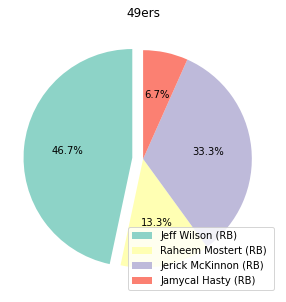

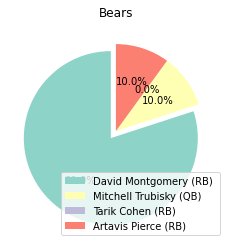

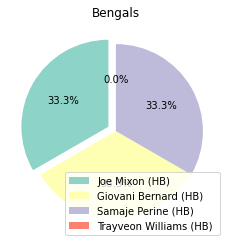

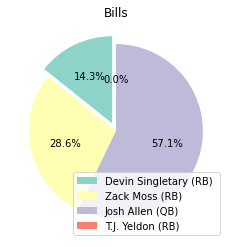

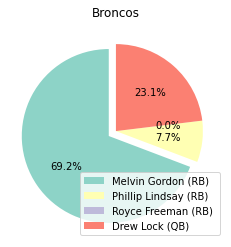

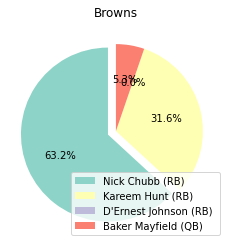

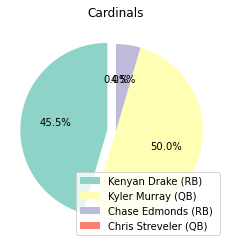

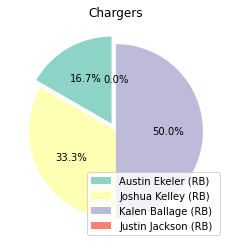

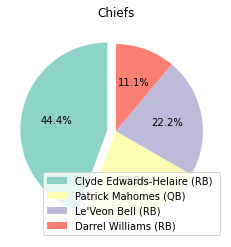

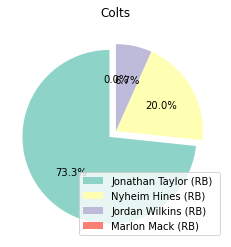

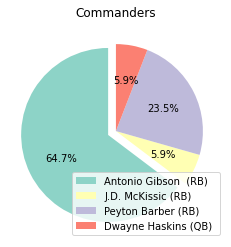

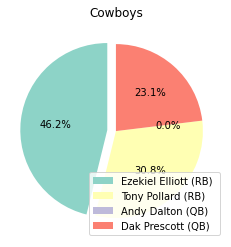

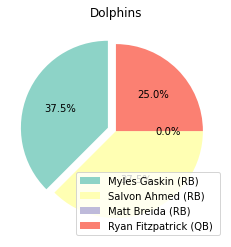

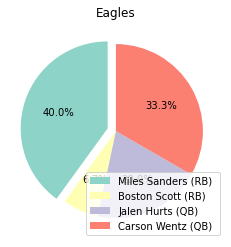

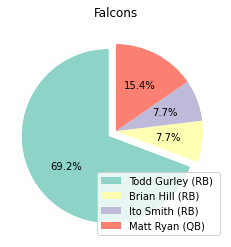

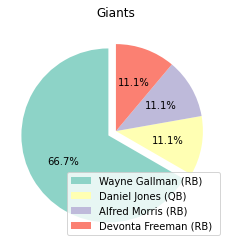

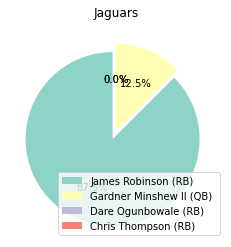

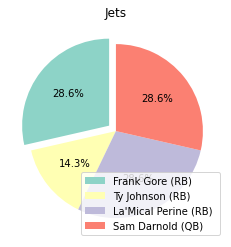

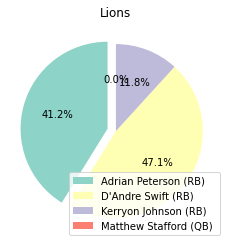

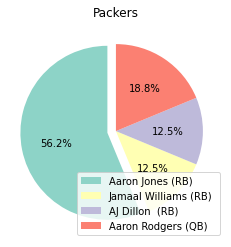

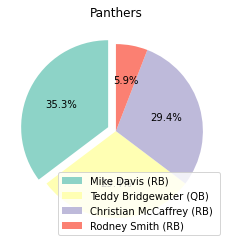

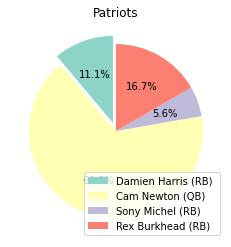

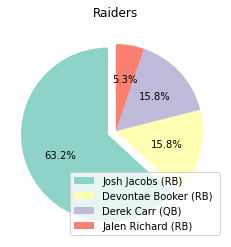

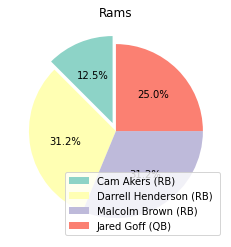

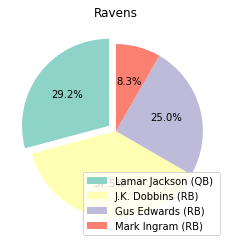

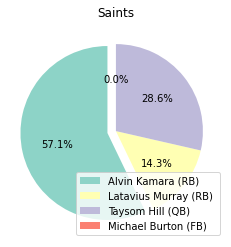

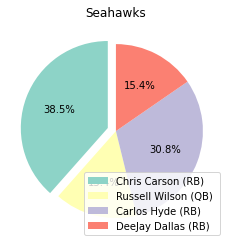

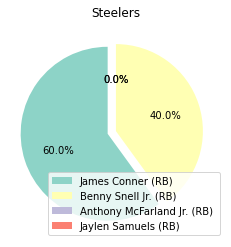

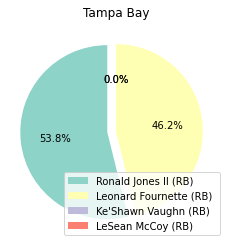

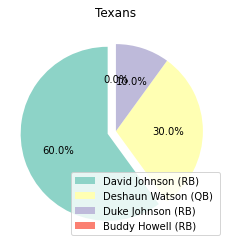

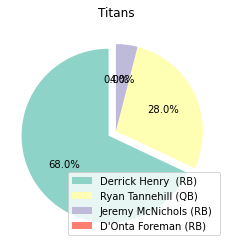

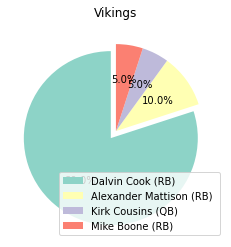

In [32]:
# Put the team stat between the parentheses. Either 'rush_yds', 'rush_td', 'rush_att'.
team_rushers_breakdown("rush_td")

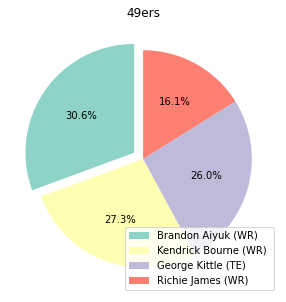

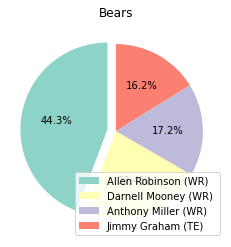

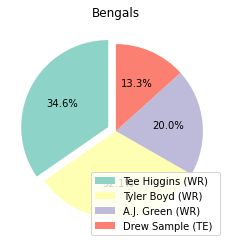

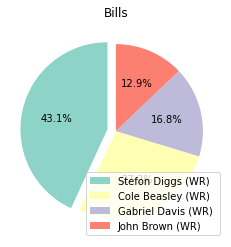

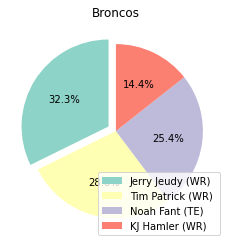

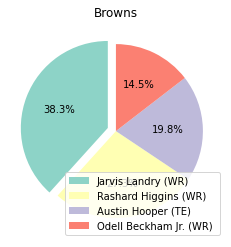

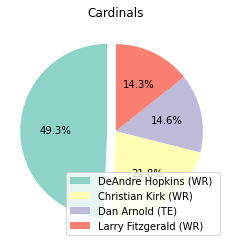

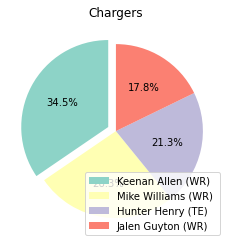

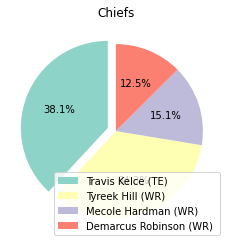

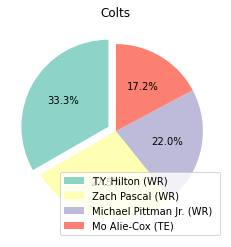

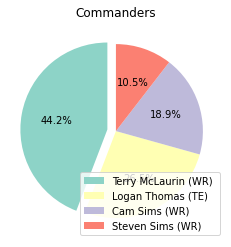

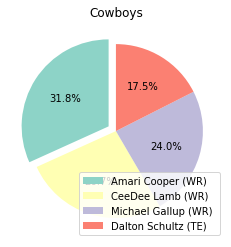

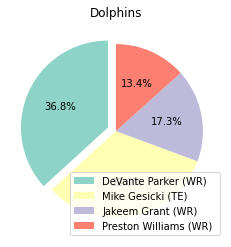

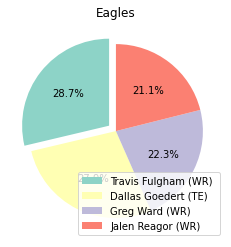

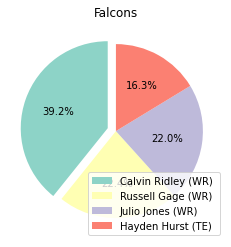

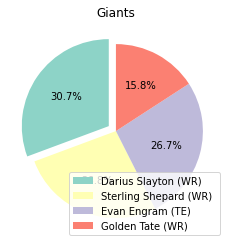

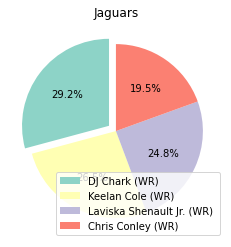

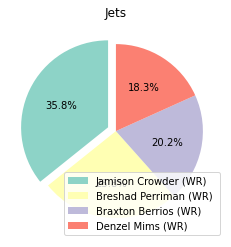

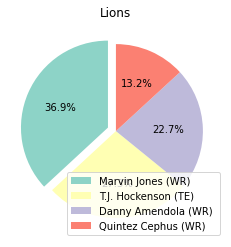

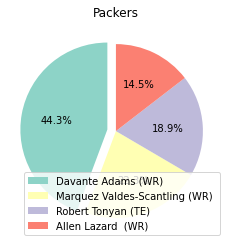

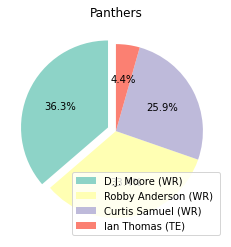

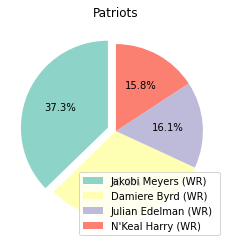

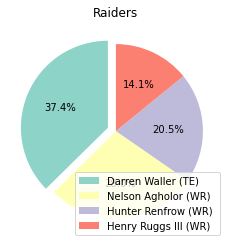

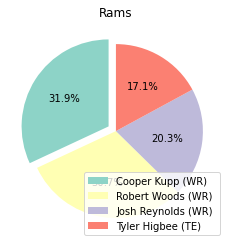

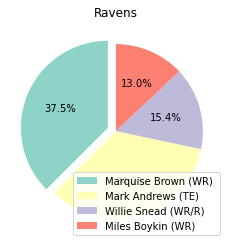

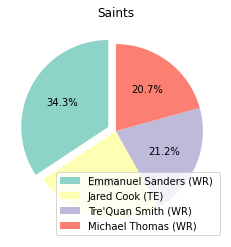

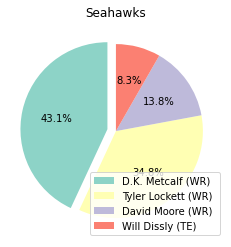

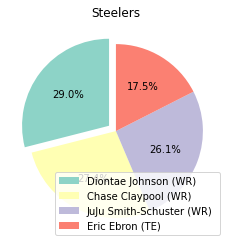

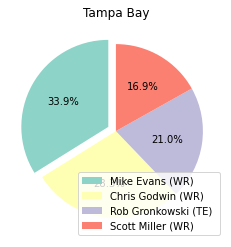

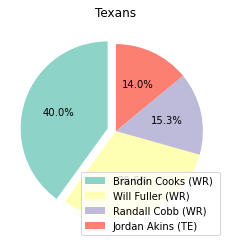

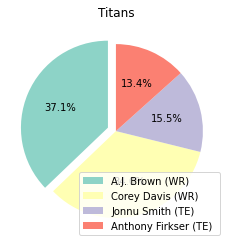

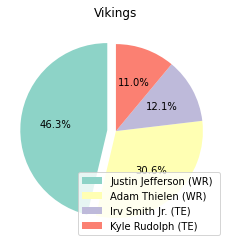

In [33]:
# Put the team stat between the parentheses. Either 'rec_yds', 'rec_td', 'targets'
team_pass_catcher_breakdown("rec_yds")